<a href="https://colab.research.google.com/github/agarwalarpit99/Handwritten-digit-recognition-using-Deep-Learning/blob/master/HandWritten%20digit%20recognition%20using%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [0]:
train=pd.read_csv('/content/drive/My Drive/COLAB FILES/Datasets/train.csv')
test=pd.read_csv('/content/drive/My Drive/COLAB FILES/Datasets/test.csv')

In [0]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
train.shape

(42000, 785)

In [0]:
Y=train['label']
X=train.drop('label',axis=1)

In [0]:
ytrain=Y.values
xtrain=X.values

In [0]:
test=test.values

In [0]:
xtrain[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [0]:
xtrain=xtrain/255.0
test=test/255.0

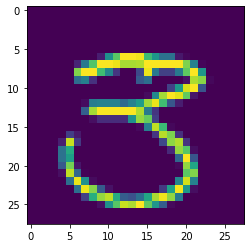

3

In [0]:
plt.imshow(xtrain[7].reshape(28,28))
plt.show()
ytrain[7]

In [0]:
xtrain.shape

(42000, 784)

In [0]:
from keras.utils import to_categorical
ytrain=to_categorical(ytrain)

In [0]:
from keras import Sequential
from keras.layers import Dense,Dropout

In [0]:
ytrain[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(xtrain,ytrain,test_size=0.3,random_state=2)

In [0]:
model=Sequential()
model.add(Dense(units=40,kernel_initializer='he_uniform',activation='relu',input_dim=784))
model.add(Dropout(0.2))
model.add(Dense(units=40,kernel_initializer='he_uniform',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=50,kernel_initializer='he_uniform',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10,kernel_initializer='glorot_uniform',activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),batch_size=100,nb_epoch=100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.





Train on 29400 samples, validate on 12600 samples
Epoch 1/100





29400/29400 [==============================] - 11s 366us/step - loss: 1.0250 - acc: 0.6607 - val_loss: 0.3587 - val_acc: 0.8943
Epoch 2/100
29400/29400 [==============================] - 2s 53us/step - loss: 0.4989 - acc: 0.8513 - val_loss: 0.2668 - val_acc: 0.9209
Epoch 3/100
29400/29400 [==============================] - 1s 50us/step - loss: 0.3932 - acc: 0.8838 - val_loss: 0.2278 - val_acc: 0.9314
Epoch 4/100
29400/29400 [==============================] - 1s 50us/step - loss: 0.3364 - acc: 0.9017 - val_loss: 0.2039 - val_acc: 0.9406
Epoch 5/100
29400/29400 [==============================] - 2s 52us/step - loss: 0.3077 - acc: 0.9102 - val_loss: 0.1997 - val_acc: 0.9426
Epoch 6/100
29400/29400 [==============================] - 2s 54us/step - loss: 0.2832 - acc: 0.9181 - val_loss: 0.1876 - val_acc: 0.9460
Epoch 7/100
29400/29400 [==============================] - 2s 62us/step - loss: 0.2600 - acc: 0.9234 - val_loss:

In [0]:
prediction=model.predict(test)

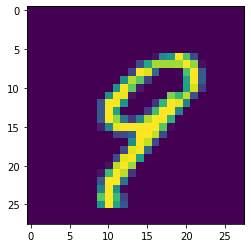

[0.         0.         0.         0.         0.16708285 0.
 0.         0.         0.         4.351582  ]


In [0]:
plt.imshow(test[67].reshape(28,28))
plt.show()
print(prediction[67])

In [0]:
l=list(prediction[0])
print(l)

[0.0, 0.0, 19.04124, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [0]:
prediction.shape

(28000, 10)

In [0]:
lt2=[]
x=0.0
ind=0
for i in range(0,len(prediction)):
  lt=[]
  lt=list(prediction[i])
  x=0
  for j in range(0,len(lt)):
    if lt[j]>x:
      x=lt[j]
      ind=j
  lt2.append(ind)  



In [0]:
lt2

In [0]:
sample=pd.read_csv('/content/drive/My Drive/COLAB FILES/Datasets/sample_submission.csv')

In [0]:
sample.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [0]:
sample.shape

(28000, 2)

In [0]:
sample.drop('Label',axis=1,inplace=True)

In [0]:
sample['Label']=pd.DataFrame(lt2)

In [0]:
sample.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3


In [0]:
sample.to_csv('mnist_sub_ann4.csv',index=False)

In [0]:
#USING CNN

In [0]:
xtrain=xtrain.reshape(len(xtrain),28,28,1)
#xtest=xtest.reshape(len(xtest),28,28,1)

In [0]:
xtrain.shape

(29400, 28, 28, 1)

In [0]:
test.shape

(28000, 784)

In [0]:
test=test.reshape(len(test),28,28,1)

In [0]:
from keras.layers import Conv2D,Flatten,MaxPool2D
from keras import Sequential

In [0]:
classifier=Sequential()
classifier.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(28,28,1)))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))
classifier.add(Conv2D(64,kernel_size=3,activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))
classifier.add(Flatten())
classifier.add(Dense(units=96,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=10,activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
classifier.fit(xtrain,ytrain,validation_split=0.3,epochs=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 29399 samples, validate on 12601 samples
Epoch 1/10





29399/29399 [==============================] - 8s 273us/step - loss: 0.2198 - acc: 0.9296 - val_loss: 0.0638 - val_acc: 0.9802
Epoch 2/10
29399/29399 [==============================] - 6s 214us/step - loss: 0.0686 - acc: 0.9789 - val_loss: 0.0544 - val_acc: 0.9824
Epoch 3/10
29399/29399 [==============================] - 6s 207us/step - loss: 0.0485 - acc: 0.9845 - val_loss: 0.0444 - val_acc: 0.9874
Epoch 4/10
29399/29399 [==============================] - 6s 199us/step - loss: 0.0388 - acc: 0.9875 - val_loss: 0.0440 - val_acc: 0.9858
Epoch 5/10
29399/29399 [==============================] - 6s 200us/step - loss: 0.0305 - acc: 0.9900 - val_loss: 0.0406 - val_acc: 0.9875
Epoch 6/10
29399/29399 [==============================] - 6s 196us/step - loss: 0.0250 - acc: 0.9918 - val_loss: 0.0404 - val_acc: 0.9890
Epoch 7/10
29399/293

In [0]:
predictions=classifier.predict(test)

In [0]:
lt2=[]
x=0.0
ind=0
for i in range(0,len(predictions)):
  lt=[]
  lt=list(predictions[i])
  x=0
  for j in range(0,len(lt)):
    if lt[j]>x:
      x=lt[j]
      ind=j
  lt2.append(ind)  



In [0]:
sample.drop('Label',axis=1,inplace=True)

In [0]:
sample['Label']=pd.DataFrame(lt2)

In [0]:
sample.to_csv('mnist_using_cnn4.csv',index=False)

In [0]:
!pip install keras-tuner

     |████████████████████████████████| 61kB 10.8MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=9d4104f0c49a220386f056d296bd71fac1b5e182d1e073bbd21b9b79db0a884a
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=204f09bc24942c7e0abea2149111763d81fb09bced471bcdf712bb88f1ed1d7f
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [0]:
def build_model(hp):  
  model1 = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model1.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  
  return model1

In [0]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [0]:
tuner_search=RandomSearch(build_model,
                          objective='val_acc',
                          max_trials=5,directory='output',project_name="Mnist")

INFO:tensorflow:Reloading Oracle from existing project output/Mnist/oracle.json


In [0]:
tuner_search.search(xtrain,ytrain,epochs=3,validation_split=0.1)

Train on 37800 samples, validate on 4200 samples
Epoch 1/3
37800/37800 [==============================] - 10s 268us/sample - loss: 0.2545 - acc: 0.9413 - val_loss: 0.1059 - val_acc: 0.9683
Epoch 2/3
37800/37800 [==============================] - 10s 264us/sample - loss: 0.1040 - acc: 0.9696 - val_loss: 0.0860 - val_acc: 0.9748
Epoch 3/3
37800/37800 [==============================] - 10s 262us/sample - loss: 0.0821 - acc: 0.9766 - val_loss: 0.0863 - val_acc: 0.9736


Train on 37800 samples, validate on 4200 samples
Epoch 1/3
37800/37800 [==============================] - 8s 206us/sample - loss: 0.2038 - acc: 0.9430 - val_loss: 0.0994 - val_acc: 0.9733
Epoch 2/3
37800/37800 [==============================] - 7s 197us/sample - loss: 0.0973 - acc: 0.9717 - val_loss: 0.0902 - val_acc: 0.9755
Epoch 3/3
37800/37800 [==============================] - 8s 200us/sample - loss: 0.0862 - acc: 0.9753 - val_loss: 0.1270 - val_acc: 0.9688


Train on 37800 samples, validate on 4200 samples
Epoch 1/3
37800/37800 [==============================] - 9s 243us/sample - loss: 0.1355 - acc: 0.9585 - val_loss: 0.0552 - val_acc: 0.9807
Epoch 2/3
37800/37800 [==============================] - 9s 236us/sample - loss: 0.0434 - acc: 0.9865 - val_loss: 0.0573 - val_acc: 0.9800
Epoch 3/3
37800/37800 [==============================] - 9s 242us/sample - loss: 0.0245 - acc: 0.9920 - val_loss: 0.0572 - val_acc: 0.9810


Train on 37800 samples, validate on 4200 samples
Epoch 1/3
37800/37800 [==============================] - 7s 196us/sample - loss: 0.3535 - acc: 0.8916 - val_loss: 0.2088 - val_acc: 0.9367
Epoch 2/3
37800/37800 [==============================] - 7s 188us/sample - loss: 0.1606 - acc: 0.9514 - val_loss: 0.1634 - val_acc: 0.9524
Epoch 3/3
37800/37800 [==============================] - 7s 188us/sample - loss: 0.1269 - acc: 0.9608 - val_loss: 0.1360 - val_acc: 0.9557


Train on 37800 samples, validate on 4200 samples
Epoch 1/3
37800/37800 [==============================] - 9s 239us/sample - loss: 0.2148 - acc: 0.9410 - val_loss: 0.1401 - val_acc: 0.9598
Epoch 2/3
37800/37800 [==============================] - 9s 235us/sample - loss: 0.1028 - acc: 0.9702 - val_loss: 0.0940 - val_acc: 0.9717
Epoch 3/3
37800/37800 [==============================] - 9s 229us/sample - loss: 0.0874 - acc: 0.9748 - val_loss: 0.0967 - val_acc: 0.9755


INFO:tensorflow:Oracle triggered exit


In [0]:
model=tuner_search.get_best_models(num_models=1)[0]

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
dense (Dense)                (None, 96)                3539040   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                970       
Total params: 3,577,578
Trainable params: 3,577,578
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(xtrain, ytrain, epochs=10, validation_split=0.1, initial_epoch=3)

Train on 37800 samples, validate on 4200 samples
Epoch 4/10
37800/37800 [==============================] - 9s 236us/sample - loss: 0.0162 - acc: 0.9949 - val_loss: 0.0563 - val_acc: 0.9833
Epoch 5/10
37800/37800 [==============================] - 9s 239us/sample - loss: 0.0116 - acc: 0.9960 - val_loss: 0.0788 - val_acc: 0.9826
Epoch 6/10
37800/37800 [==============================] - 9s 238us/sample - loss: 0.0106 - acc: 0.9966 - val_loss: 0.0644 - val_acc: 0.9864
Epoch 7/10
37800/37800 [==============================] - 9s 231us/sample - loss: 0.0072 - acc: 0.9975 - val_loss: 0.0720 - val_acc: 0.9831
Epoch 8/10
37800/37800 [==============================] - 9s 233us/sample - loss: 0.0061 - acc: 0.9980 - val_loss: 0.0678 - val_acc: 0.9850
Epoch 9/10
37800/37800 [==============================] - 9s 234us/sample - loss: 0.0077 - acc: 0.9977 - val_loss: 0.0715 - val_acc: 0.9840
Epoch 10/10
37800/37800 [==============================] - 9s 231us/sample - loss: 0.0049 - acc: 0.9985 - val_l

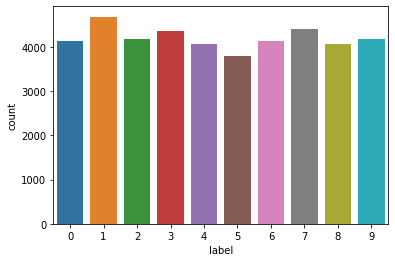

In [0]:
import seaborn as sns
sns.countplot(train['label'])